In [92]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

## 1. 이미지 준비하기

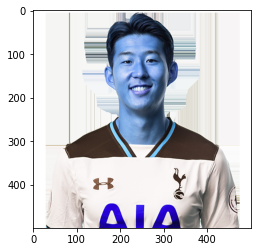

In [93]:
my_image_path = os.getenv('HOME')+'/aiffel/exploration/heungmin.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      #출력용 이미지
plt.imshow(img_bgr)#사진 출력
plt.show()

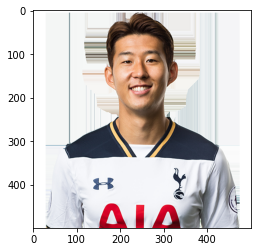

In [94]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #BRG > RGB로 변경
plt.imshow(img_rgb)
plt.show()

## 2. 얼굴 검출

In [95]:
# detector 선언
detector_hog = dlib.get_frontal_face_detector()


In [96]:
#얼굴 bounding box추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)


rectangles[[(182, 82) (311, 211)]]


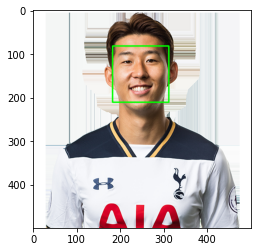

In [97]:
# 찾은 얼굴 출력
print(dlib_rects)   #dlib_rectangles

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. 얼굴 랜드마크 

In [98]:
#dlib에서 제공되는 weighte file 사용해 landmark모델 저장
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


In [99]:
#landmark_predictor은 RGB이미지와 dlib.rectangle 받아서 dlib.full_object_detection반환

list_landmarks = []


for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) #RGB이미지와 dlib.rectangle 받음
    # face landmark 좌표를 저장해둡니다
    #map으로 points를 만들고, append이용해 리스트에 추가
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


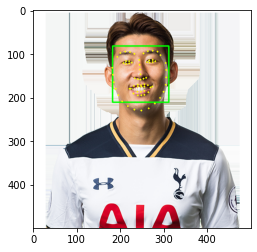

In [100]:
#랜드마크를 이미지에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 4. 스티커 적용하기

In [101]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코끝의 index는 33
    x = landmark[33][0] # 코끝 x좌표값
    y = landmark[33][1] # 코끝 y좌표값
    w = h = dlib_rect.width() # 경계박스 너비
    print ('(x,y) : (%d,%d)'%(x,y)) # (x,y) : (387,240)
    print ('(w,h) : (%d,%d)'%(w,h)) # (w,h) : (130,130)

(246, 159)
(x,y) : (246,159)
(w,h) : (130,130)


In [102]:
# 수염 이미지를 불러와서 resize하기
sticker_path = os.getenv('HOME')+'/aiffel/exploration/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러오기
img_sticker = cv2.resize(img_sticker, (w,h)) #경계박스 크기에 맞게 resize
print(img_sticker.shape)


(130, 130, 3)


In [103]:
# 이미지에서 스티커 좌표 설정
# 수염 이미지의 시작점은 x = x_코끝 -w//2, y=y_코끝 - h//2
refined_x = x - w // 2
refined_y = y - h //2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (181,94)


In [104]:
# 원본 이미지에 스티커 적용
#이미지의 좌측상단 좌표부터 우측 하단 좌표까지
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
#스티커중, 고양이 수염이 있는 부분(255)이면 수염픽셀, 아니면 원본이미지 위치시키자!

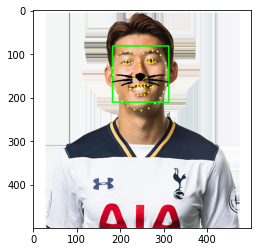

In [105]:
#스티커 위치시킨 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [106]:
#수염이 아주 살짝만 위에 있으면 좋을것 같은데?
# y좌표를 10만 더 빼보자
refined_x = x - w // 2
refined_y = y - h //2 -10
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (181,84)


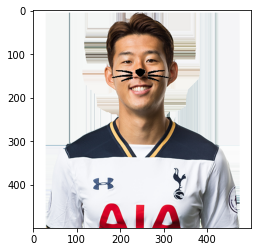

In [107]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 회고

사실 cv분야는 크게 관심있어하는 분야가 아니었는데, 사진을 통해서 어플로만 써봤던 기능을
실제로 구현해보니까 굉장히 재밌었다. 사진을 처음 구할때는 정면 사진이 코를 나타내기 편하겠지?
라는 생각으로 정면 사진을 구했는데, 생각해보니 측면 사진, 회전된 사진 등으로 스티커를 입혀봐야 실력이 더 늘것 같다는 생각이 들었다.
마지막에 코끝의 위치를 조정하면 더 좋은 위치에 스티커가 들어갈 것이라 생각하고 조정해봤는데, 결과가 더욱 좋아진것 같아서 매우 만족스럽다.
노드를 진행할때는 np.where을 왜 쓰는거지? 라는 생각을 했었는데, 직접 실습해보니 np.where을 쓰는 이유와 스티커를 얼굴 위에 입히는 게 아니라, 그 부분의 픽셀만 대체해야 한다는 것을 깨닫게 되었다.